In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams

In [2]:
data = pd.read_csv("../csv/exported_queries/mtime_manipulated.csv")
data.head()

,mtime,group_country,group_state,long,lat,timezone_str,datetime_timezoned,date,time
0,1554151594772,us,oh,-81.57,41.08,America/New_York,01/04/2019 17:00:00,Monday,17:00:00
1,1554268907000,us,ma,-71.10,42.37,America/New_York,03/04/2019 01:00:00,Wednesday,01:00:00
2,1554147703000,de,none,11.58,48.14,Europe/Berlin,01/04/2019 22:00:00,Monday,22:00:00
3,1554157339000,us,ca,-118.00,34.14,America/Los_Angeles,01/04/2019 15:00:00,Monday,15:00:00
4,1554220406070,us,fl,-80.06,26.71,America/New_York,02/04/2019 12:00:00,Tuesday,12:00:00


In [3]:
data1 = data[['date','time']] #define new dataframe
data1.head() #check

,date,time
0,Monday,17:00:00
1,Wednesday,01:00:00
2,Monday,22:00:00
3,Monday,15:00:00
4,Tuesday,12:00:00


In [4]:
data1['date'] = pd.Categorical(data1['date'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
data1['values'] = 1 #create a column that represent the single instance
pivot_table = data1.pivot_table(values = 'values', index = 'date', columns = 'time', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number of times a message is generated in a certain
#week's day, in a certain hour
pivot_table
#we can ignore this warning, it's caused by the creation of values' column, but being composed of only 1 this warning is useless

C:\Users\fabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\fabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
date,,,,,,,,,,,,,,,,,,,,,
Monday,7482,3208,1735,877,667,949,1870,4158,7973,11718,...,21116,22004,22898,24388,22231,19100,18915,20808,19734,15320
Tuesday,9091,4616,2634,1719,1606,2190,4847,9614,15294,20220,...,24315,24602,25298,25552,24250,19834,19069,20805,19310,15338
Wednesday,8913,4717,2720,1711,1606,2140,4334,8372,14189,17832,...,22976,23404,23373,23528,21170,17286,17673,19100,19470,14771
Thursday,8788,4377,2735,1564,1423,2196,4389,8718,13791,18084,...,20810,21603,21679,22558,21226,16966,15641,18792,18282,14063
Friday,8365,4572,2605,1724,1433,2208,4584,9103,13650,17517,...,19594,19791,19807,19343,18976,16568,15746,16723,14820,12498
Saturday,7682,5064,2828,1740,1499,1979,3661,7620,13644,16985,...,15928,14911,14380,14438,14842,13499,12764,12738,12248,10372
Sunday,6283,4577,2784,2086,1639,1741,2781,5964,9963,13044,...,14546,13709,13384,11570,11679,11399,11773,12210,10669,7886


In [5]:
rcParams['figure.figsize'] = 18, 12 #define a parameter to change the figure size

Text(141,0.5,'Weekdays')

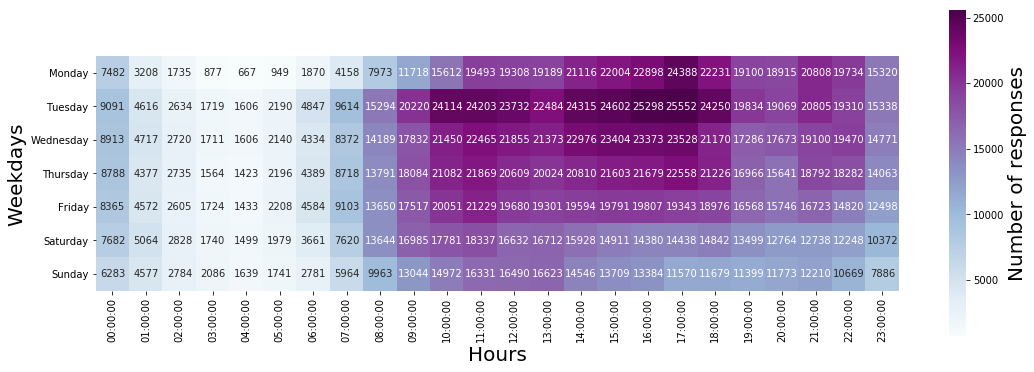

In [6]:
figure = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of responses'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
figure.figure.axes[-1].yaxis.label.set_size(20)
figure.set_xlabel("Hours", fontsize=20)
figure.set_ylabel("Weekdays", fontsize=20)  

In [7]:
#to save the figure
#figure.figure.savefig("C:/Users/fabri/OneDrive/Desktop/heatmap.png")